In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [7]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [8]:
X = data.data
y = data.target

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

In [16]:
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
r2_score(y_test,y_pred)

0.5188118914964637

In [18]:
np.sqrt(mean_squared_error(y_test,y_pred))

48.727108291413984

In [22]:
from sklearn.linear_model import Ridge

In [23]:
r = Ridge(alpha=0.0001)

In [24]:
r.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [26]:
y_pred1 = r.predict(X_test)

In [29]:
print(r2_score(y_test, y_pred1))
print(np.sqrt(mean_squared_error(y_test,y_pred1)))

0.5189738344370789
48.71890809371285


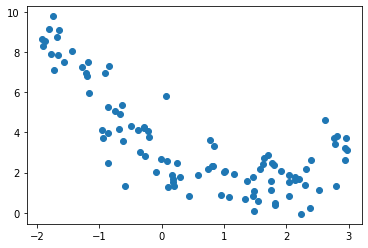

In [30]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1**2 - 2 * x1 + 3 + np.random.randn(m,1)
plt.scatter(x1, x2)
plt.show()

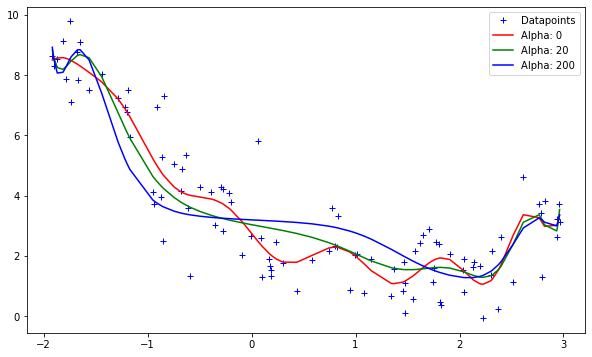

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()